In [1]:
!pip install pykml

In [2]:
from pykml import parser

In [3]:
with open('task_2_sensor.kml') as f:
    doc = parser.parse(f)
doc

In [7]:
root = doc.getroot()
root.document

AttributeError: no such child: {http://www.opengis.net/kml/2.2}document

In [5]:
print(root.Documnet)

AttributeError: no such child: {http://www.opengis.net/kml/2.2}Documnet

## Use of BeautifulSoup

In [1]:
from bs4 import BeautifulSoup as bs

In [2]:

with open('task_2_sensor.kml') as f:
    soup = bs(f,'lxml')
print(soup.prettify)

<bound method Tag.prettify of <?xml version="1.0" encoding="UTF-8"?><html><body><kml xmlns="http://www.opengis.net/kml/2.2" xmlns:atom="http://www.w3.org/2005/Atom" xmlns:gx="http://www.google.com/kml/ext/2.2" xmlns:kml="http://www.opengis.net/kml/2.2">
<document>
<name></name>
<description><p> </p><p><br/>Converted using <b><a href="http://gpx2kml.com" title="Go to gpx2kml.com">gpx2kml.com</a></b></p><br/>]]&gt;</description>
<visibility>1</visibility>
<open>1</open>
<style id="red">
            <LineStyle>
            <color>C81400FF</color>
            <width>4</width>
            </LineStyle>
        </style>
<style id="route_red">
            <LineStyle>
            <color>961400FF</color>
            <width>4</width>
            </LineStyle>
        </style>
<style id="green">
            <LineStyle>
            <color>C878FF00</color>
            <width>4</width>
            </LineStyle>
        </style>
<style id="route_green">
            <LineStyle>
            <color>9678FF0

In [3]:
coords = (('').join((soup.find_all('coordinates'))[0])).strip(' \n ')

In [4]:
coordinates = coords.split(' ')
type(coordinates)

list

In [5]:
import pandas as pd

# Original Dataframe

In [6]:
df = pd.DataFrame({'coordinates':coordinates})

In [7]:
df.shape

(4750, 1)

In [8]:
df.value_counts()
#1623 unique values

coordinates          
13.323645,52.500595,0    267
13.307849,52.48841,0     101
13.323018,52.499687,0     83
13.304753,52.488472,0     82
13.303592,52.46551,0      62
                        ... 
13.310582,52.466766,0      1
13.32483,52.49994,0        1
13.296095,52.46491,0       1
13.324216,52.49996,0       1
13.319646,52.463245,0      1
Length: 1623, dtype: int64

# Dataframe with duplicate values

In [9]:
data = df['coordinates'].str.split(',', expand=True)

data.columns = ['longitude', 'latitude', 'altitude']
#[['longitude', 'latitude', 'altitude']]
data = data.astype(float)
data1 = data.copy()

In [10]:
def trans_df(df):
    df = df['coordinates'].str.split(',', expand=True)
    df.columns = ['longitude', 'latitude', 'altitude']
    df.columns = ['longitude', 'latitude', 'altitude']
    df = df.astype(float)
    return df

In [11]:
import matplotlib.pyplot as plt

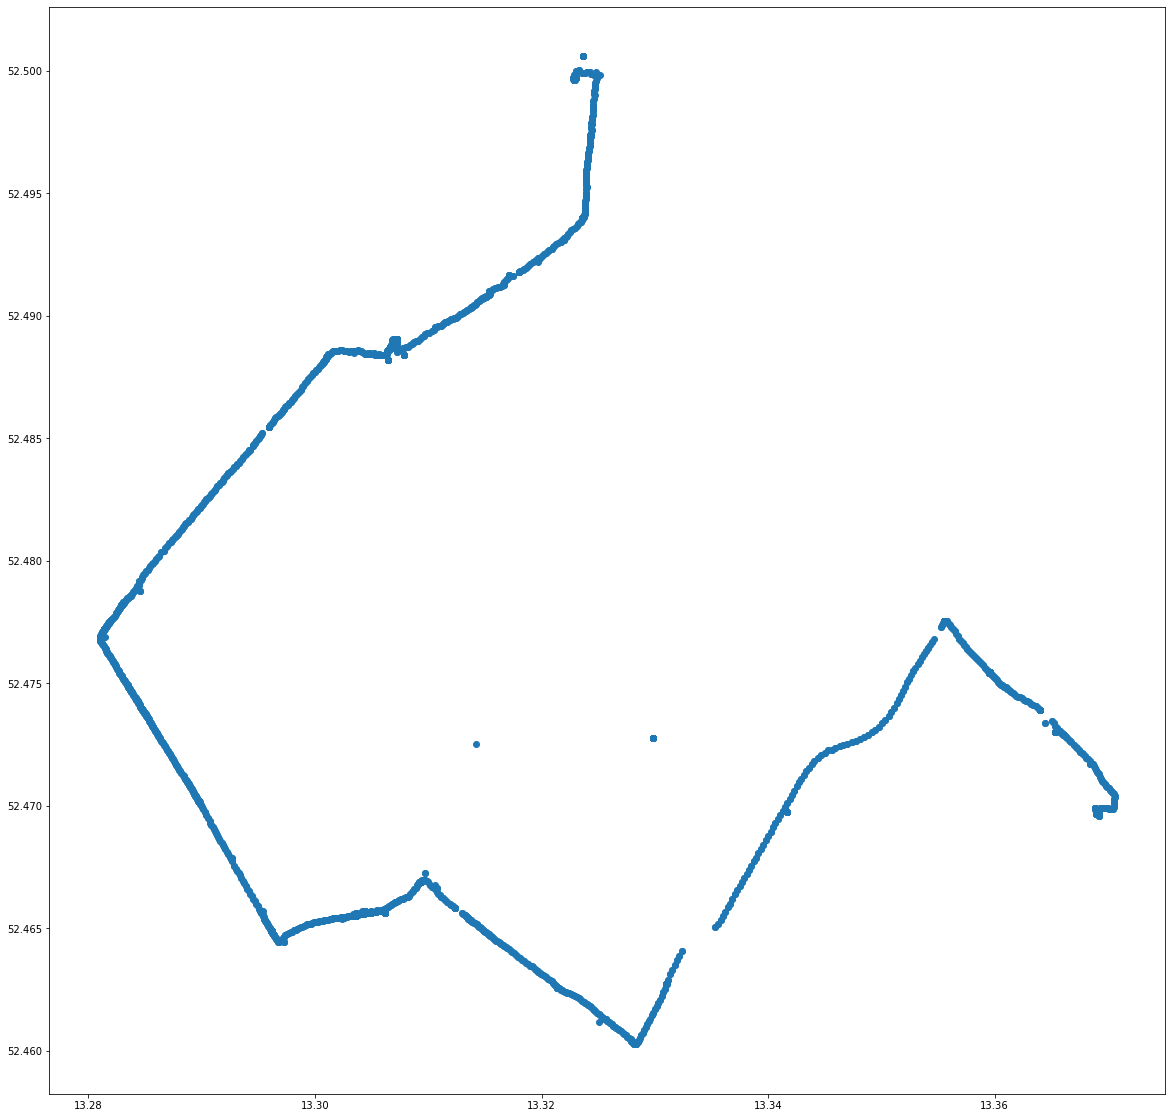

In [12]:
plt.figure(figsize=(20,20))
plt.scatter(data['longitude'],data['latitude'])
plt.show()

In [13]:
import numpy as np
from math import radians

def distance_km(lon1, lat1, lon2, lat2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lon1, lat1, lon2, lat2 = map(np.radians,[lon1,lat1,lon2,lat2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


data['dist'] = \
    distance_km(data.longitude.shift(), data.latitude.shift(),
                 data.loc[1:, 'longitude'], data.loc[1:, 'latitude'])

In [14]:
data['dist'].sort_values(ascending=False)

4202    2.921794
4201    2.913124
4296    2.036294
4276    2.034236
1220    1.858209
          ...   
1755    0.000000
1757    0.000000
1759    0.000000
4749    0.000000
0            NaN
Name: dist, Length: 4750, dtype: float64

In [15]:
data['dist'][data['dist'].sort_values(ascending=False)<0.05].sum()

13.385584140415446

### Observations:

    - 3119 entries gives 0 km diatnce
    - 3 entries gives 1.73km which deemed to be outliers or incorrect data

# Drop the duplicate values
## 1. Making changes in updated dataframe

In [16]:
data1.drop_duplicates(inplace=True)

In [17]:
data1.shape

(1623, 3)

In [18]:
data1['dist'] = \
    distance_km(data1.longitude.shift(), data1.latitude.shift(),
                 data1.loc[1:, 'longitude'], data1.loc[1:, 'latitude'])

In [19]:
data1['dist'].sort_values(ascending=False)

4202    2.921794
4201    2.913124
4296    2.036294
4276    2.034236
801     1.758279
          ...   
4618    0.000391
3713    0.000351
3705    0.000340
791     0.000340
0            NaN
Name: dist, Length: 1623, dtype: float64

In [20]:
data1['dist'].sum()

37.91073654437598

In [21]:
data1['dist'][data1['dist'].sort_values(ascending=False)<0.05].sum()

13.385580575936117

## Observations:
- Outliers are removed

In [22]:
df1 = df.copy()
df

,coordinates
0,"13.323018,52.499687,0"
1,"13.323018,52.499687,0"
2,"13.323018,52.499687,0"
3,"13.323018,52.499687,0"
4,"13.323018,52.499687,0"
...,...
4745,"13.36889,52.469894,0"
4746,"13.36889,52.469894,0"
4747,"13.36889,52.469894,0"
4748,"13.36889,52.469894,0"


In [23]:
df_no_dupl = df1.drop_duplicates()
df_no_dupl

,coordinates
0,"13.323018,52.499687,0"
83,"13.322913,52.499603,0"
85,"13.322848,52.499664,0"
87,"13.322805,52.49968,0"
89,"13.322763,52.49968,0"
...,...
4712,"13.368881,52.469894,0"
4714,"13.368884,52.46991,0"
4718,"13.368891,52.469894,0"
4722,"13.368892,52.46989,0"


In [24]:
df_no_dupl = trans_df(df_no_dupl)


In [25]:
df_no_dupl.head()

,longitude,latitude,altitude
0,13.323018,52.499687,0.0
83,13.322913,52.499603,0.0
85,13.322848,52.499664,0.0
87,13.322805,52.499680,0.0
89,13.322763,52.499680,0.0


In [26]:
df_no_dupl['dist'] = \
    distance_km(df_no_dupl.longitude.shift(), df_no_dupl.latitude.shift(),
                 df_no_dupl.loc[1:, 'longitude'], df_no_dupl.loc[1:, 'latitude'])

<AxesSubplot:>

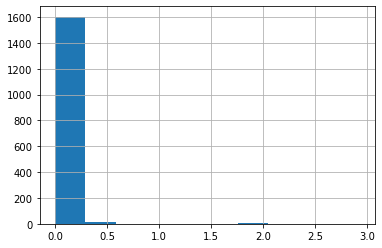

In [27]:
(df_no_dupl['dist'].fillna(0)).hist()

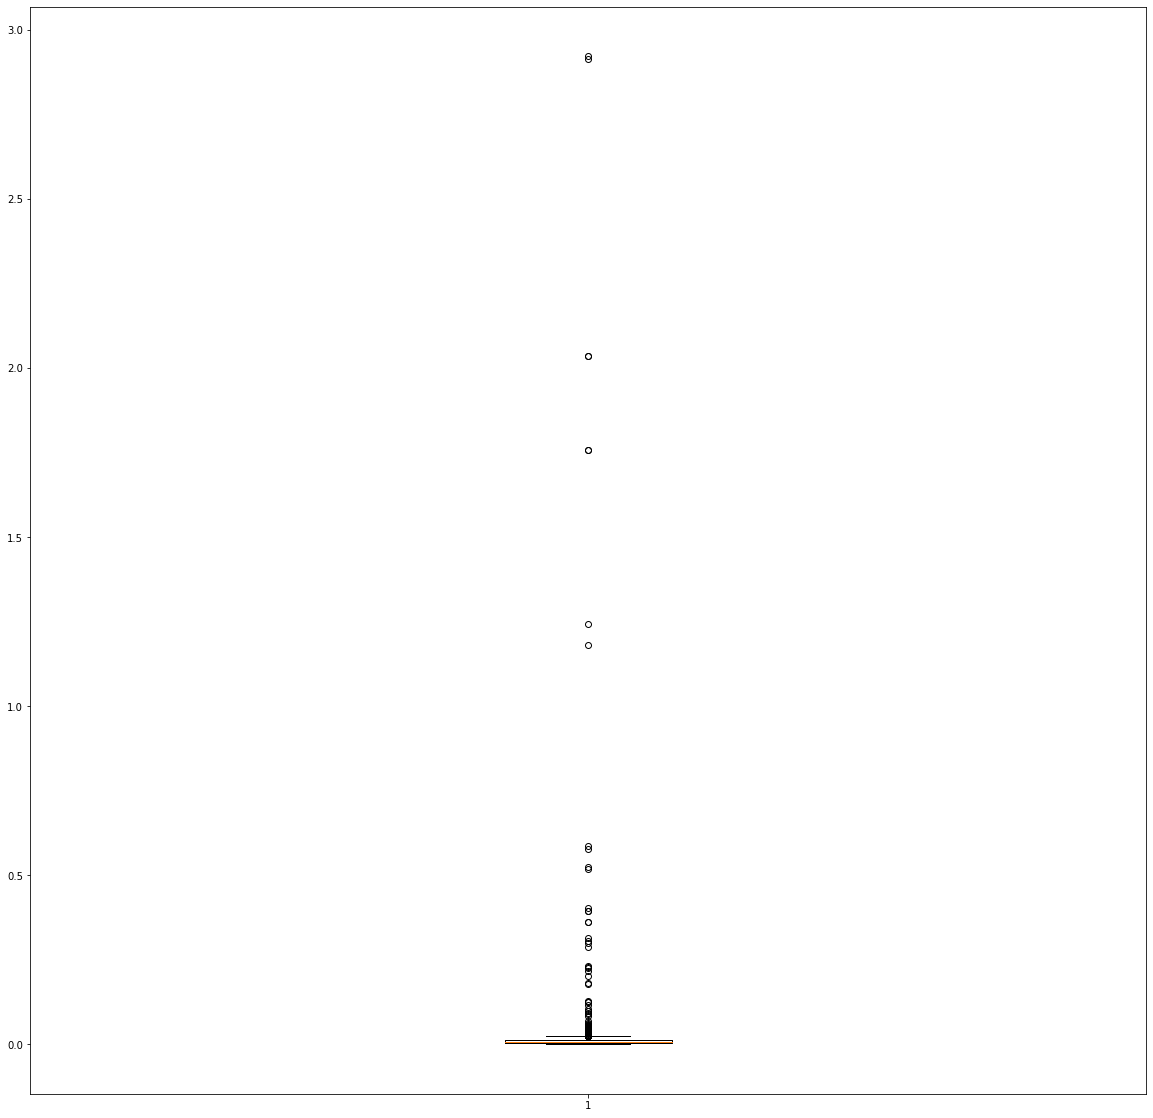

In [48]:
plt.figure(figsize=(20,20))
plt.boxplot((df_no_dupl['dist'].fillna(0)))
plt.savefig('boxplot.png', bbox_inches='tight')

In [42]:
average = df_no_dupl['dist'].fillna(0).mean()
std_dev = df_no_dupl['dist'].fillna(0).std()

upper_limit = average + (3 * std_dev)
lower_limit = average - (3 * std_dev)
upper_limit

0.47352348335167327

In [43]:
df_no_dupl['dist'][df_no_dupl['dist'].sort_values(ascending=False)<.05].sum()

13.385580575936117

In [44]:
df_no_dupl['dist']

0            NaN
83      0.011737
85      0.008085
87      0.003411
89      0.002843
          ...   
4712    0.001225
4714    0.001791
4718    0.001841
4722    0.000450
4744    0.000465
Name: dist, Length: 1623, dtype: float64

In [47]:
percentile25 = df_no_dupl['dist'].quantile(0.25)
percentile75 = df_no_dupl['dist'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
upper_limit

0.02407390801790488

In [46]:
df_no_dupl['dist'][df_no_dupl['dist']<upper_limit].sum()

11.631653252159147

In [49]:
upper_limit = df_no_dupl['dist'].quantile(0.99)
lower_limit = df_no_dupl['dist'].quantile(0.01)
upper_limit

0.3525403006055457